---
# 2. 데이터 전처리
---
## 2.1. 데이터 가져오기
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../data/titanic.csv')
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


---
## 2.2. 데이터 전처리
---
### 2.2.1.  명목형 자료 변환하기
#### 2.2.1.1. 성별을 처리하기
- 남성을 0, 여성은 1

In [3]:
df=df.replace({'male':0,'female':1})

#### 2.2.1.2. dummy방식
- get_dummies

In [4]:
pd.get_dummies(df.Embarked).tail()

,C,Q,S
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0
890,0,1,0


### 2.2.2. 순서형 자료- 수치 맵핑 변환
- 수치에 맵칭하여 변환하지만, 수치 간 크기 차이는 커스텀 가능
- 크기 차이가 머신러닝 결과에 영향을 끼칠 수 있음
---
## 2.3. 수치형 자료 전처리
---
- 정규화vs 표준화 vs 범주화(범주가 중요한 경우 사용)
### 2.3.1. 정규화

In [5]:
def normal(data):
    data = (data - data.min()) / (data.max() - data.min())
    return data

df.Fare.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [6]:
df['Fare_normal']=normal(df.Fare)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_normal
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.015469


### 2.3.2. 표준화

In [7]:
def standard(data):
    data = (data - data.mean())/data.std()
    return data

In [8]:
df['Fare_standard']=standard(df.Fare)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_normal,Fare_standard
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.014151,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0.139136,0.786404


### 2.3.3. 범주화
- 변수의 값보다 범주가 중요한 경우 사용
---
## 2.4. 데이터 정제 및 분리하기
---
### 2.4.1. 결측값 처라하기
1. 방식
    1. 샘플 삭제
    2. 변수 삭제
    3. 다른 값으로 대체

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    int64  
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Embarked       889 non-null    object 
 11  Fare_normal    891 non-null    float64
 12  Fare_standard  891 non-null    float64
dtypes: float64(4), int64(6), object(3)
memory usage: 90.6+ KB


#### 2.4.1.1. 케빈 변수 제거 - 결측값이 포함되어있는 샘플제거

In [9]:
df=df.drop(columns=['Cabin'])
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_normal,Fare_standard
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0.014151,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0.139136,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0.015469,-0.488580


#### 2.4.1.2. 결측치 제거

In [11]:
df=df.dropna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_normal,Fare_standard
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0.014151,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0.139136,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0.015469,-0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0.103644,0.420494
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0.015713,-0.486064


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    712 non-null    int64  
 1   Survived       712 non-null    int64  
 2   Pclass         712 non-null    int64  
 3   Name           712 non-null    object 
 4   Sex            712 non-null    int64  
 5   Age            712 non-null    float64
 6   SibSp          712 non-null    int64  
 7   Parch          712 non-null    int64  
 8   Ticket         712 non-null    object 
 9   Fare           712 non-null    float64
 10  Embarked       712 non-null    object 
 11  Fare_normal    712 non-null    float64
 12  Fare_standard  712 non-null    float64
dtypes: float64(4), int64(6), object(3)
memory usage: 77.9+ KB


#### 2.4.1.3. 이상치 처리-나이

In [14]:
titanic=pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic_mod=titanic.drop(columns=['Cabin'])

In [16]:
titanic_mod2=titanic_mod.dropna()

In [17]:
titanic_mod2.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 712, dtype: float64

<AxesSubplot:>

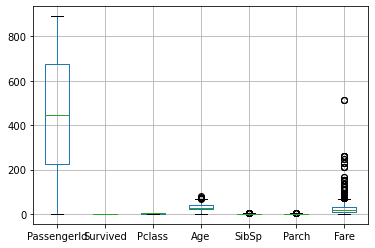

In [18]:
titanic_mod2.boxplot()

In [19]:
#나이가 이상한 값
titanic_mod2[titanic_mod2['Age']-np.floor(titanic_mod2['Age'])>0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
57,58,0,3,"Novel, Mr. Mansouer",male,28.50,0,0,2697,7.2292,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,Q
122,123,0,2,"Nasser, Mr. Nicholas",male,32.50,1,0,237736,30.0708,C
123,124,1,2,"Webber, Miss. Susan",female,32.50,0,0,27267,13.0000,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,26.0000,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.50,0,0,A.5. 11206,8.0500,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.50,0,2,A/5. 851,14.5000,S
203,204,0,3,"Youseff, Mr. Gerious",male,45.50,0,0,2628,7.2250,C


In [20]:
outlier=titanic_mod2[titanic_mod2['Age']-np.floor(titanic_mod2['Age'])>0]['Age']
outlier

57     28.50
78      0.83
111    14.50
116    70.50
122    32.50
123    32.50
148    36.50
152    55.50
153    40.50
203    45.50
227    20.50
296    23.50
305     0.92
331    45.50
469     0.75
525    40.50
644     0.75
676    24.50
735    28.50
755     0.67
767    30.50
803     0.42
814    30.50
831     0.83
843    34.50
Name: Age, dtype: float64

In [21]:
titanic_mod2[titanic_mod2['Age']-np.floor(titanic_mod2['Age'])==0]#(정상치)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [22]:
len(outlier)

25

In [23]:
df_final=titanic_mod2[titanic_mod2['Age']-np.floor(titanic_mod2['Age'])==0]#(정상치)

---
## 2.5. 모델링
---

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [26]:
#1. feature data, label data(지도학습)

X = df_final.drop(columns=['Survived'])
y = df_final['Survived']

print('X의 데이터 개수:%d'%(len(X)))
print('y의 데이터 개수:%d'%(len(y)))

X의 데이터 개수:687
y의 데이터 개수:687


In [27]:
#2. train data, test data로 분리
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#random_state=42숫자를 각각 적용해보고 나은거 선택

print('학습한 데이터 개수:%d'%(len(X_train)))
print('테스타 하기 위해 남겨둔 데이터 개수:%d'%(len(X_test)))

학습한 데이터 개수:480
테스타 하기 위해 남겨둔 데이터 개수:207
